In [1]:
import sys
module_path = os.path.abspath('..')
sys.path.append(module_path)
from lc.measurements import CurveMeasurements
from lc.curve import LearningCurveEstimator
from omegaconf import OmegaConf
import matplotlib
import matplotlib.pyplot as plt

Load lazy error measurments - just 1 measurement each at full, half, and quarter dataset sizes

In [2]:
curvems = CurveMeasurements()
curvems.load_from_json('../data/no_pretr_ft_lazy.json')
print(curvems)

--
num_train_samples: 100
test_errors: [45.01]
num_ms: 1
--
num_train_samples: 200
test_errors: [35.36]
num_ms: 1
--
num_train_samples: 400
test_errors: [27.92]
num_ms: 1
--



Load config and set v_1 manually since error variance estimates can no longer be computed from measurements. 

In [3]:
cfg = OmegaConf.load('../lc/config.yaml')
cfg.v_1 = 20.0
print(OmegaConf.to_yaml(cfg))

gamma: -0.5
gamma_search: true
gamma_range:
- -1.0
- 0
search_reg_coeff: 5
normalize_objective: false
variance_type: smooth
use_weights: true
ddof: 1
v_0: 0.02
v_1: 20.0
min_n: 20
'N': 400
num_interp_pts: 100
marker_size: 20



Estimate curve

In [4]:
curve_estimator = LearningCurveEstimator(cfg)
lazy_curve, objective = curve_estimator.estimate(curvems)

Plot the smooth variance computed using the values of `cfg.v_0` and `cfg.v_1` set above to see if they match your expectation. 

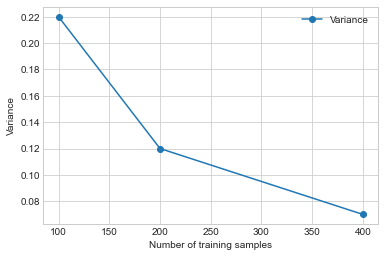

In [5]:
curve_estimator.err_mean_var_estimator.visualize_by_type(curvems,'smooth')

Plot the curve estimated from lazy measurments

------------------------------
Learning curve summary
------------------------------
error_400: 27.955
beta_400: 18.0819
gamma: -0.43
alpha: 6.9295
eta: 276.4594


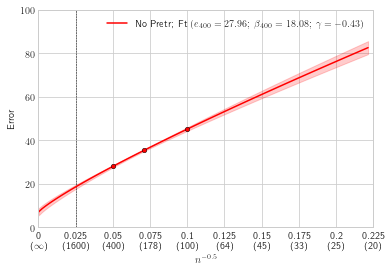

In [6]:
curve_estimator.plot(lazy_curve,curvems,label='No Pretr; Ft')
lazy_curve.print_summary(cfg.N)

Compare to the non-lazy version. This is the one which uses more training set sizes as well as multiple measurements per training set size. Fortunately, for our lazy experimenter, the 3-measurement curve yields a nearly identical curve and very similar values of $e_{400}$ and $\beta_{400}$ as compared to one computed from more exhaustive measurements!

------------------------------
Learning curve summary
------------------------------
error_400: 27.9133
beta_400: 18.2284
gamma: -0.41
alpha: 5.6835
eta: 259.2864


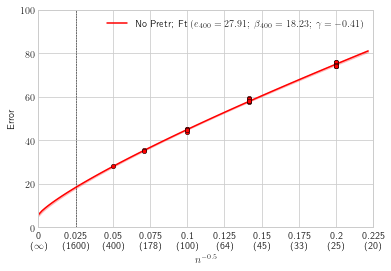

In [7]:
cfg.v_1 = None
curvems.load_from_json('../data/no_pretr_ft.json')
active_curve, objective = curve_estimator.estimate(curvems)
curve_estimator.plot(active_curve,curvems,label='No Pretr; Ft')
active_curve.print_summary(cfg.N)

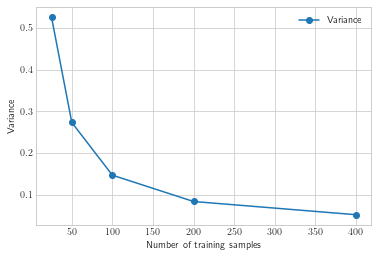

In [8]:
curve_estimator.err_mean_var_estimator.visualize_by_type(curvems,'smooth')